# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 579


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={unit}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | al lagowa
Processing Record 2 of Set 1 | tazacorte
Processing Record 3 of Set 1 | camocim
Processing Record 4 of Set 1 | kailua-kona
Processing Record 5 of Set 1 | dolyna
Processing Record 6 of Set 1 | west island
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | weno
Processing Record 10 of Set 1 | isafjordur
Processing Record 11 of Set 1 | sur
Processing Record 12 of Set 1 | mount gambier
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | sidi akkacha
Processing Record 17 of Set 1 | kulia village
City not found. Skipping...
Processing Record 18 of Set 1 | mezgor'e
City not found. Skipping...
Processing Record 19 of Set 1 | codrington
Processing Record 20 of Set 1 | nova sintra
Processing Record 21 of Set 1 | albany
Processing Rec

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,al lagowa,11.4000,29.1333,30.65,14,19,2.59,SD,1702222246
1,tazacorte,28.6290,-17.9293,22.54,73,0,2.06,ES,1702222246
2,camocim,-2.9022,-40.8411,30.46,60,92,7.57,BR,1702222246
3,kailua-kona,19.6406,-155.9956,23.66,74,0,1.79,US,1702221977
4,dolyna,48.9733,24.0094,-3.27,94,97,1.48,UA,1702222246


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,al lagowa,11.4000,29.1333,30.65,14,19,2.59,SD,1702222246
1,tazacorte,28.6290,-17.9293,22.54,73,0,2.06,ES,1702222246
2,camocim,-2.9022,-40.8411,30.46,60,92,7.57,BR,1702222246
3,kailua-kona,19.6406,-155.9956,23.66,74,0,1.79,US,1702221977
4,dolyna,48.9733,24.0094,-3.27,94,97,1.48,UA,1702222246


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

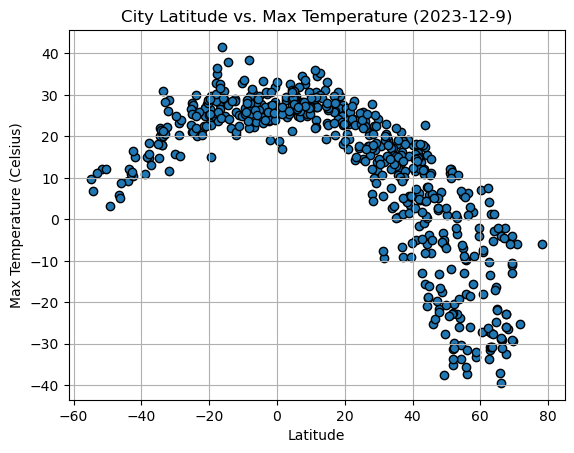

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-12-9)")
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

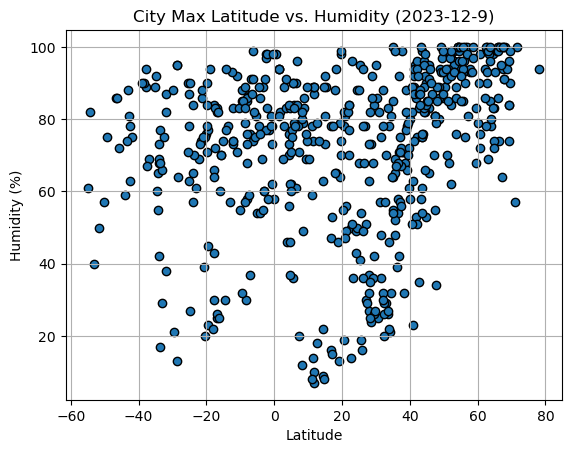

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2023-12-9)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

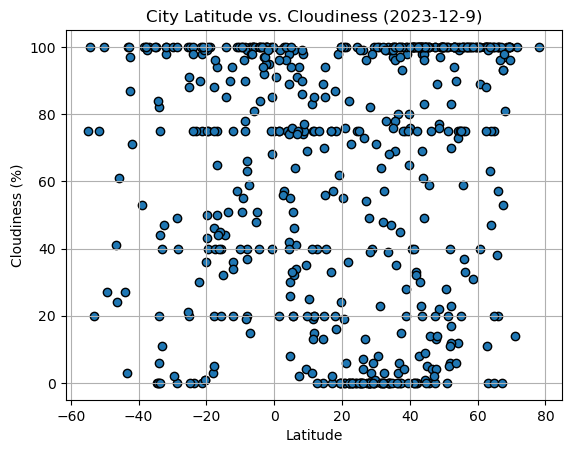

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-12-9)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

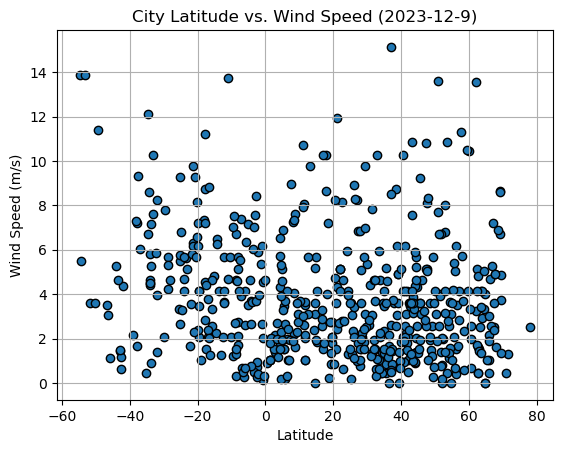

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-12-9)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression(df, x_value_header, y_value_header, x_coord_int, y_coord_int):

    # Store Latitude and Temperature as x and y values
    x_values = df[x_value_header]
    y_values = df[y_value_header]

    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot scatter plot
    plt.scatter(x_values,y_values)

    # Plot regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_coord_int,y_coord_int),fontsize=15,color="red")

    # Label plot
    plt.xlabel(x_value_header)
    plt.ylabel(y_value_header)

    # Print r square value
    print(f"The r-value is: {rvalue}")
    print(f"The r-squared value is: {rvalue**2}")

    # Show plot
    plt.show()


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,al lagowa,11.4000,29.1333,30.65,14,19,2.59,SD,1702222246
1,tazacorte,28.6290,-17.9293,22.54,73,0,2.06,ES,1702222246
3,kailua-kona,19.6406,-155.9956,23.66,74,0,1.79,US,1702221977
4,dolyna,48.9733,24.0094,-3.27,94,97,1.48,UA,1702222246
8,weno,7.4515,151.8468,28.39,71,94,8.97,FM,1702222246


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,camocim,-2.9022,-40.8411,30.46,60,92,7.57,BR,1702222246
5,west island,-12.1568,96.8225,25.99,83,36,5.66,CC,1702222246
6,grytviken,-54.2811,-36.5092,6.93,82,100,5.48,GS,1702222246
7,puerto ayora,-0.7393,-90.3518,26.98,78,68,4.54,EC,1702222246
11,mount gambier,-37.8333,140.7667,14.82,89,100,7.21,AU,1702222247


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8366992333699823
The r-squared value is: 0.7000656071219161


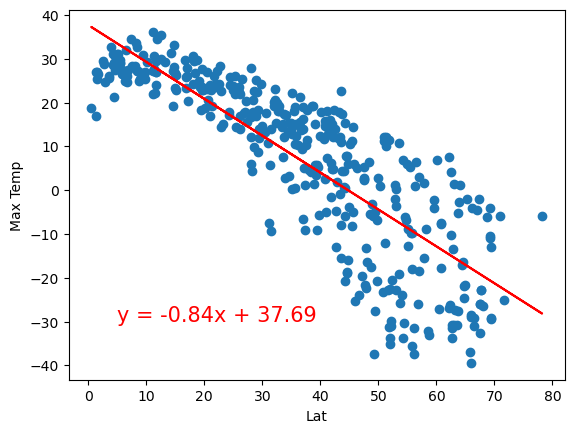

In [15]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df, "Lat", "Max Temp", 5, -30)

The r-value is: 0.7287252659195939
The r-squared value is: 0.5310405131895828


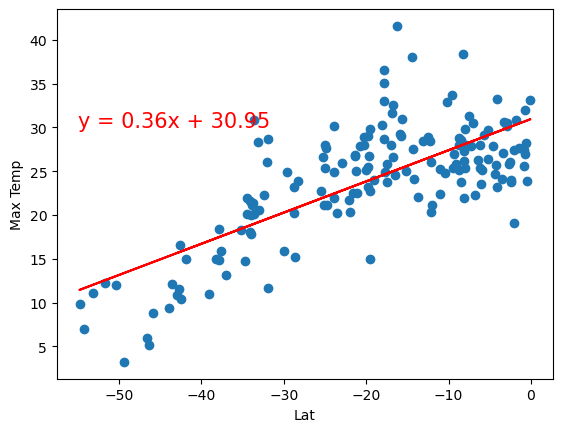

In [16]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df, "Lat", "Max Temp", -55, 30)

**Discussion about the linear relationship:** By observing the r-value, r-squared value and linear regression it is possible to notice that there is a strong linear relationship between the latitude and max temperature, specially for the Northern Hemisphere. This relationship is negative in the Northern Hemisphere and positive in the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.39443478990905984
The r-squared value is: 0.15557880349060418


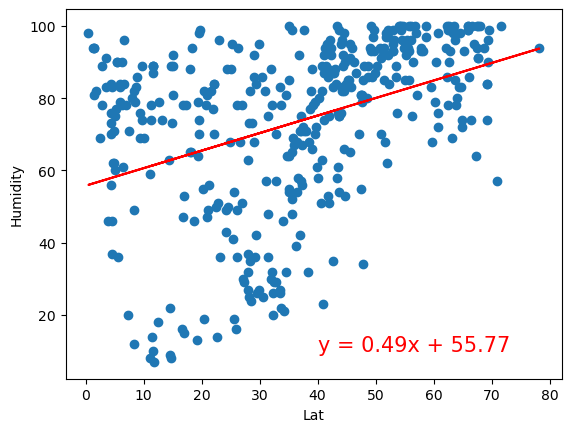

In [17]:
# Northern Hemisphere
linear_regression(northern_hemi_df, "Lat", "Humidity", 40, 10)

The r-value is: 0.11117389999854678
The r-squared value is: 0.01235963604088688


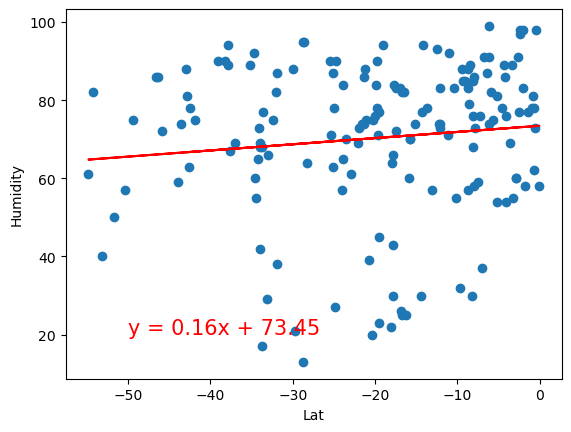

In [18]:
# Southern Hemisphere
linear_regression(southern_hemi_df, "Lat", "Humidity", -50, 20)

**Discussion about the linear relationship:** By observing the r-value, r-squared value and linear regression it is possible to notice that there is a very weak relationship between the latitude and humidity in the NOrthern Hemisphere and there is no relationship between the latitude and humidity in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.23836706034535024
The r-squared value is: 0.056818855457683844


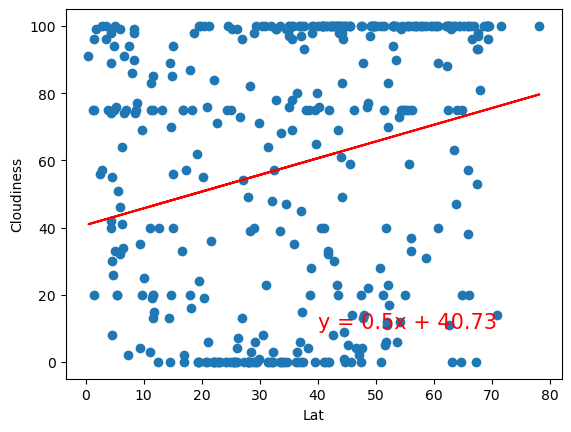

In [19]:
# Northern Hemisphere
linear_regression(northern_hemi_df, "Lat", "Cloudiness", 40, 10)

The r-value is: 0.19990860493965323
The r-squared value is: 0.03996345032891835


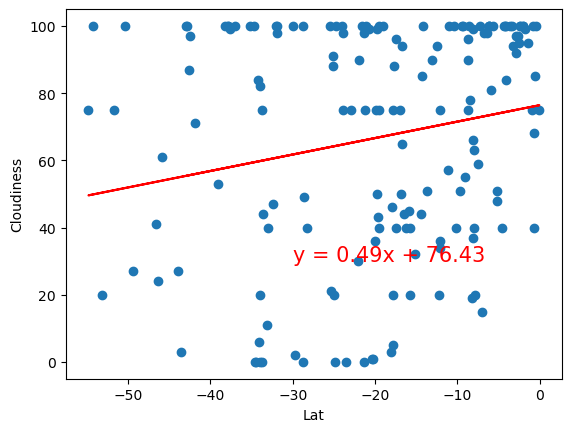

In [20]:
# Southern Hemisphere
linear_regression(southern_hemi_df, "Lat", "Cloudiness", -30, 30)

**Discussion about the linear relationship:** By observing the r-value, r-squared value and linear regression it is possible to notice that there is no relationship between the latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0221056571027003
The r-squared value is: 0.0004886600759421643


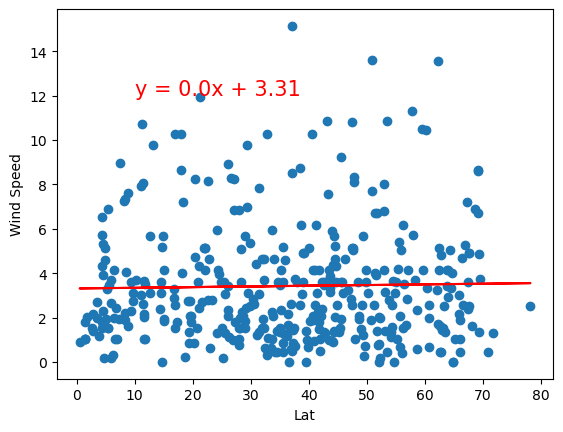

In [21]:
# Northern Hemisphere
linear_regression(northern_hemi_df, "Lat", "Wind Speed", 10, 12)

The r-value is: -0.24997155540207647
The r-squared value is: 0.062485778510133386


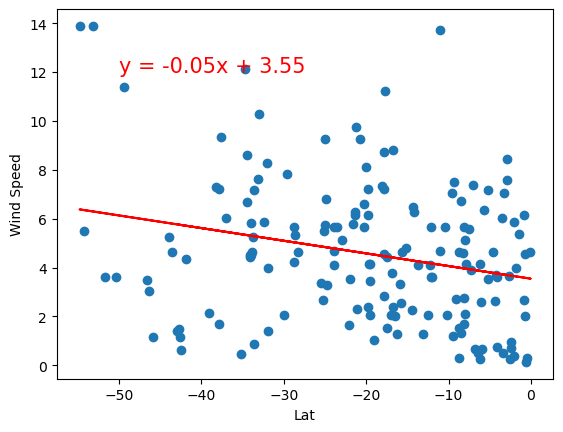

In [22]:
# Southern Hemisphere
linear_regression(southern_hemi_df, "Lat", "Wind Speed", -50, 12)

**Discussion about the linear relationship:** By observing the r-value, r-squared value and linear regression it is possible to notice that there is no relationship between the latitude and wind speed.